In [1]:
import os
from PIL import Image, ImageFont
from IPython.display import display
from torchvision.transforms.functional import to_pil_image, to_tensor
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

from utils.transform_image import draw_text_with_new_lines
from utils.initialize_font_data import fox_text, fox_text_four_lines
from utils.cross_lingual_font_retrieval import exclusive_cjk_font_paths
from utils.init_model import preprocess
cjk_font_dir_path = '../all-fonts'
character_size = 150

all_font_paths = [os.path.join(cjk_font_dir_path, font_name) for font_name in os.listdir(cjk_font_dir_path)]
inclusive_cjk_font_paths = [font_path for font_path in all_font_paths if os.path.basename(font_path) not in exclusive_cjk_font_paths]
print('Number of inclusive_cjk_font_paths', len(inclusive_cjk_font_paths))

exclusive_attributes:  ['capitals', 'cursive', 'display', 'italic', 'monospace', 'serif']
Number of inclusive_cjk_font_paths 303


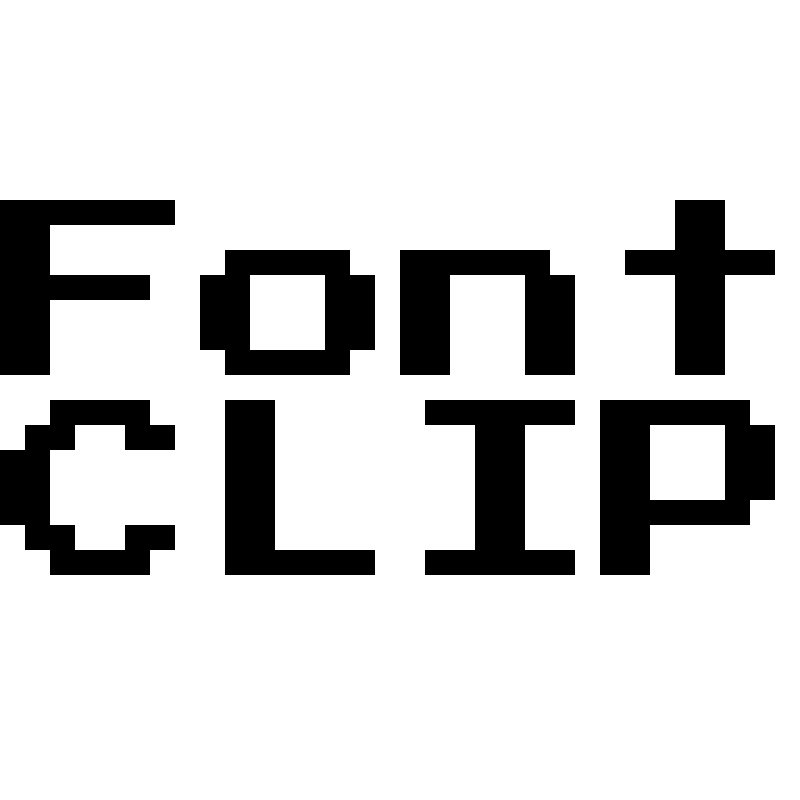

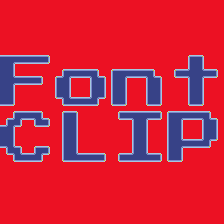

In [21]:
text = '夏底青\n森市草'
text = '夏底青\n森市草\n夏底青\n森市草'
text = '永'
text = '夏林夏林\n火山火山\n夏林夏林\n火山火山'
text = '夏林夏林夏林\n火山火山火山\n夏林夏林夏林\n火山火山火山\n夏林夏林夏林\n火山火山火山'
text = '夏林海川\n火山水鳥\n魚肉美味\n酒池日本'
text = '海川\n水鳥'
text = '夏林\n火山'
text = '安全\n出行'
text = '安全出行'
text = '春夏秋冬'
# text = '安全出行\n安全出行\n安全出行'
# text = 'ユーロ\nグラフィックス\nユーロ\nグラフィックス'
text = 'Eurographics'
# text = 'WOOD'
# text = 'Cyprus'
# text = 'Republic\nof\nCyprus'
# text = 'Tempura'
text = 'Font\nCLIP'
# text = 'Personal\nComputer'
# text = 'Hello\nWorld'
character_size = 200
# text = fox_text_four_lines
line_count = text.count('\n') + 1
img_width = len(max(text.split('\n'), key=len)) * character_size
img_height = character_size * (line_count + 2)
# font_path = '../all-fonts/Kazesawa-ExtraLight.ttf'
# font_path = '../all-fonts/851CHIKARA-DZUYOKU_kanaA_004.ttf'
# font_path = '../all-fonts/BIZUDGothic-Bold.ttf'
# font_path = '../all-fonts/07鉄瓶ゴシック.otf'
# font_path = '../all-fonts/851H-kktt_004.ttf'
# font_path = '../all-fonts/JP_ReggaeOne-Regular.ttf'
# font_path = '../all-fonts/JP_ReggaeOne-Regular.ttf'
# font_path = '../all-fonts/AlibabaPuHuiTi-2-75-SemiBold.otf'
font_path = '../all-fonts/Kaisotai-Next-UP-B.otf'
font_path = '../all-fonts/KH-Dot-Dougenzaka-12.ttf'
font_path = '../all-fonts/Chalk-S-JP.otf'
font_path = '../gwfonts/SourceSansPro-Regular.ttf'
font_path = '../gwfonts/PressStart2P-Regular.ttf'
# font_path = '../all-fonts/Kaisotai-Next-UP-B.otf'
# font_path = '../all-fonts/SourceHanSerif-Regular.otf'
# font_path = '../gwfonts/Arapey-Regular.ttf'
font = ImageFont.truetype(font_path, character_size)
image = draw_text_with_new_lines(text, font, img_width=img_width, img_height=img_height)
preprocessed_image = preprocess(image)
display(image)
display(to_pil_image(preprocessed_image))


In [35]:
character_size = 100
# text = fox_text_four_lines
line_count = text.count('\n') + 1
img_width = len(max(text.split('\n'), key=len)) * character_size
img_height = character_size * (line_count + 2)
font_path = '../all-fonts/JP_NotoSerifJP-Regular.otf'
# font_path = '../gwfonts/'
font = ImageFont.truetype(font_path, character_size)
image = draw_text_with_new_lines(text, font, img_width=img_width, img_height=img_height)
preprocessed_image1 = preprocess(image)

font_path = '../all-fonts/SourceHanSerif-Regular.otf'
# font_path = '../gwfonts/'
font = ImageFont.truetype(font_path, character_size)
image = draw_text_with_new_lines(text, font, img_width=img_width, img_height=img_height)
preprocessed_image2 = preprocess(image)

In [19]:
import torch
torch.all(torch.eq(preprocessed_image1, preprocessed_image2))

tensor(False)

# Draw SVG

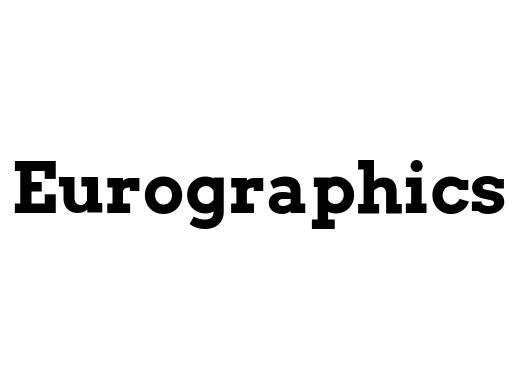

In [87]:
font_name = os.path.splitext(os.path.basename(font_path))[0]
my_font = FontProperties(fname=font_path)

fig, ax = plt.subplots()

ax.text(0.5, 0.5, text, ha='center', va='center', size=50, font_properties=my_font)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

axis_off = True
if axis_off:
    ax.axis('off')


if axis_off:
    fig.savefig(f'outputs/svg/{font_name}_no_boundary.svg')
else:
    fig.savefig(f'outputs/svg/{font_name}.svg')
plt.show()

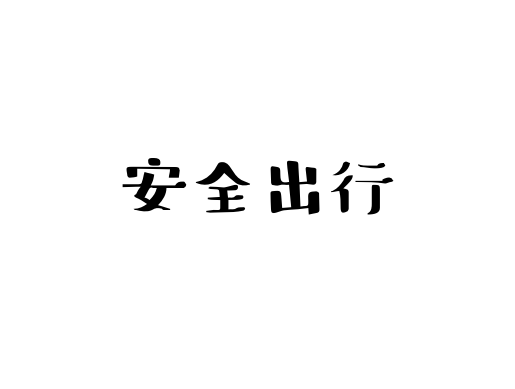

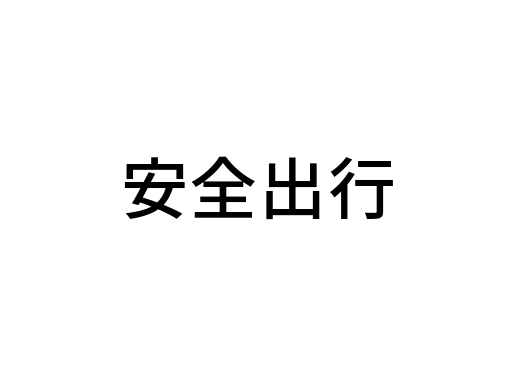

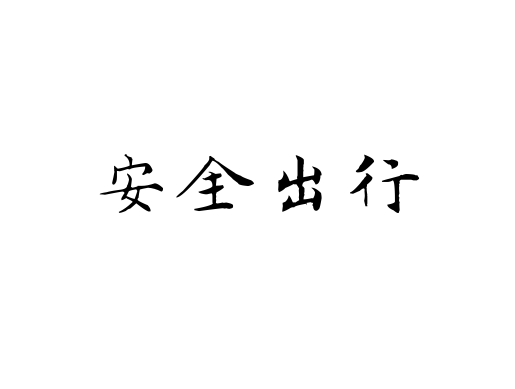

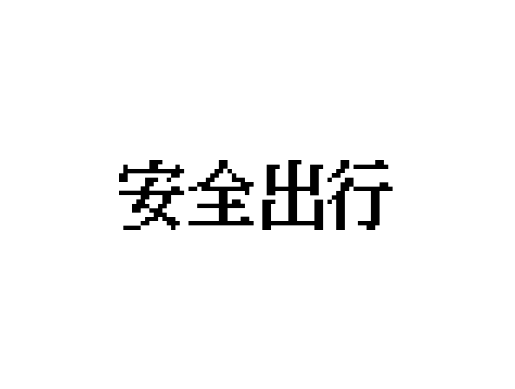

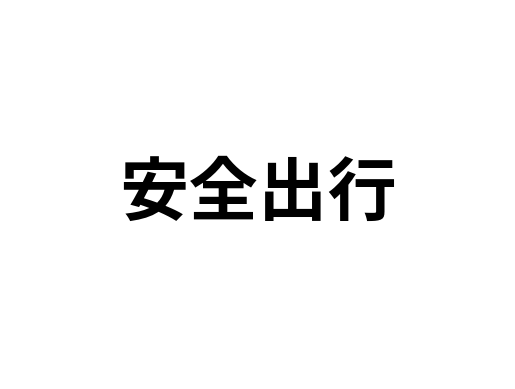

In [26]:
text = 'Eurographics'
# text = 'Font\nCLIP'
# text = 'Tempura'
# text = '天ぷら'
# text = '天ぷら\nそば\nパーティー'
text = '安全出行'
# text = '春夏秋冬'
# text = 'ユーロ\nグラフィックス'
# text = 'サンセリフ\nゴシック'
# text = 'Ramen'
# text = 'ゆかり\nごはん'
# text = 'おてもと'
font_paths = [
  '../all-fonts/001Shirokuma-Regular.otf',
  '../all-fonts/GenEiAntiqueNv5-M.ttf',
  '../all-fonts/SentyWEN2017.ttf',
  '../all-fonts/KH-Dot-Dougenzaka-16.ttf',
  '../all-fonts/NotoSansJP-Bold.otf',
]
for i, font_path in enumerate(font_paths):
  font_name = os.path.splitext(os.path.basename(font_path))[0]
  my_font = FontProperties(fname=font_path)

  fig, ax = plt.subplots()

  ax.text(0.5, 0.5, text, ha='center', va='center', size=50, font_properties=my_font)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  axis_off = True
  if axis_off:
      ax.axis('off')


  if axis_off:
      # fig.savefig(f'outputs/svg/{font_name}_no_boundary.svg')
      fig.savefig(f'outputs/svg/top{i+1}.svg')
      # fig.savefig(f'outputs/svg/base_font.svg')
  else:
      fig.savefig(f'outputs/svg/{font_name}.svg')
  plt.show()

../gwfonts/RammettoOne-Regular.ttf


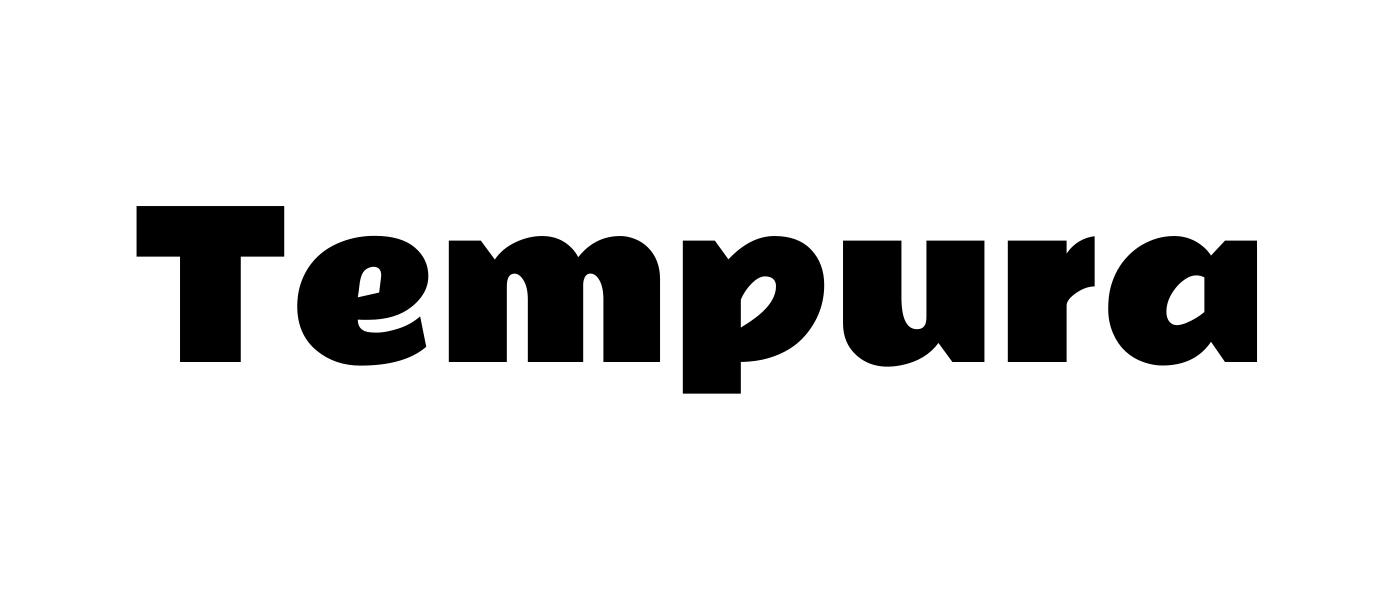

../gwfonts/DancingScript-Regular.ttf


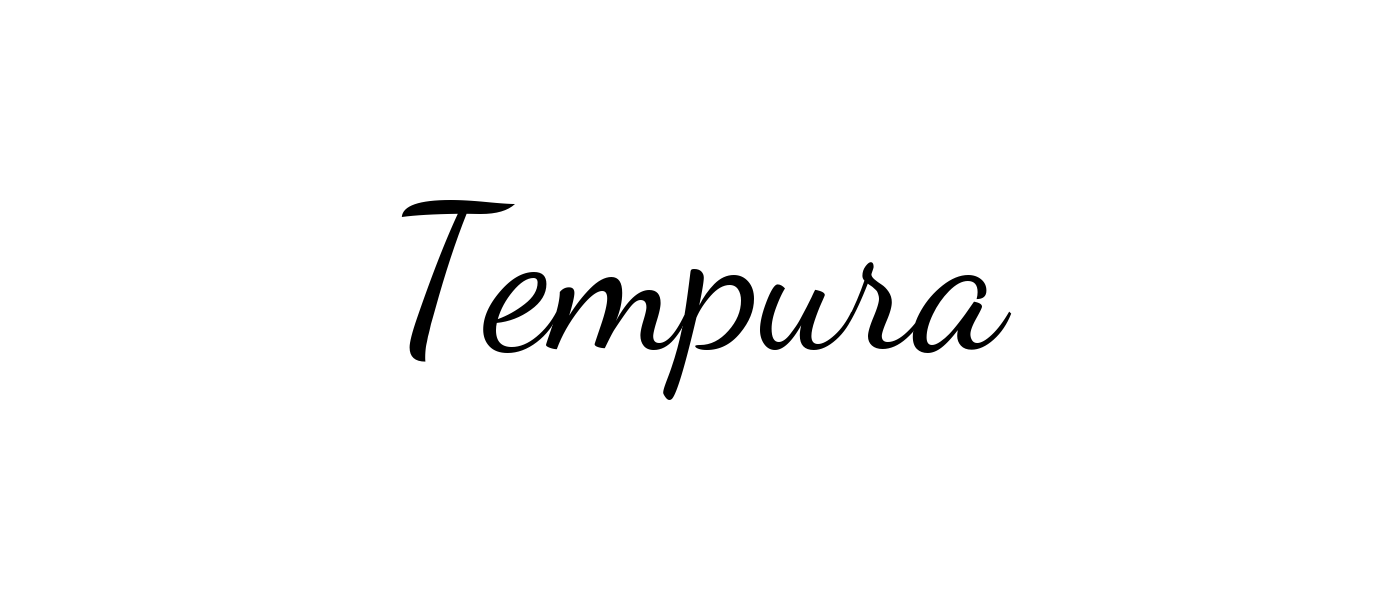

../gwfonts/JuliusSansOne-Regular.ttf


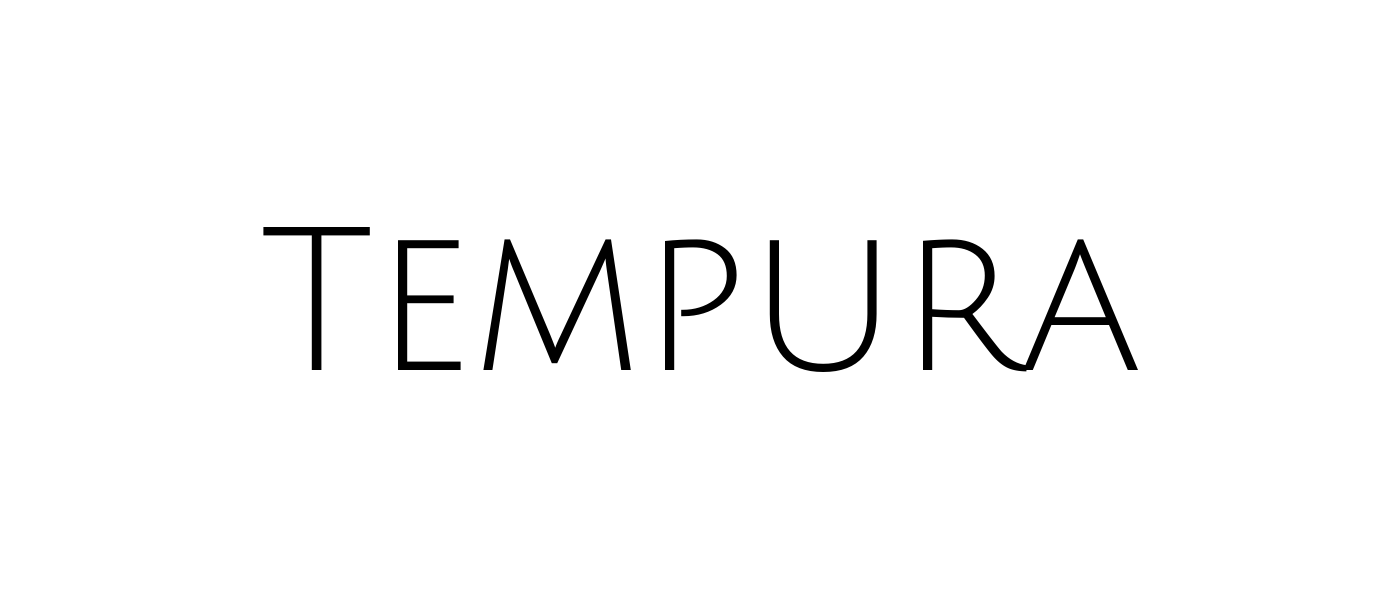

../gwfonts/Share-BoldItalic.ttf


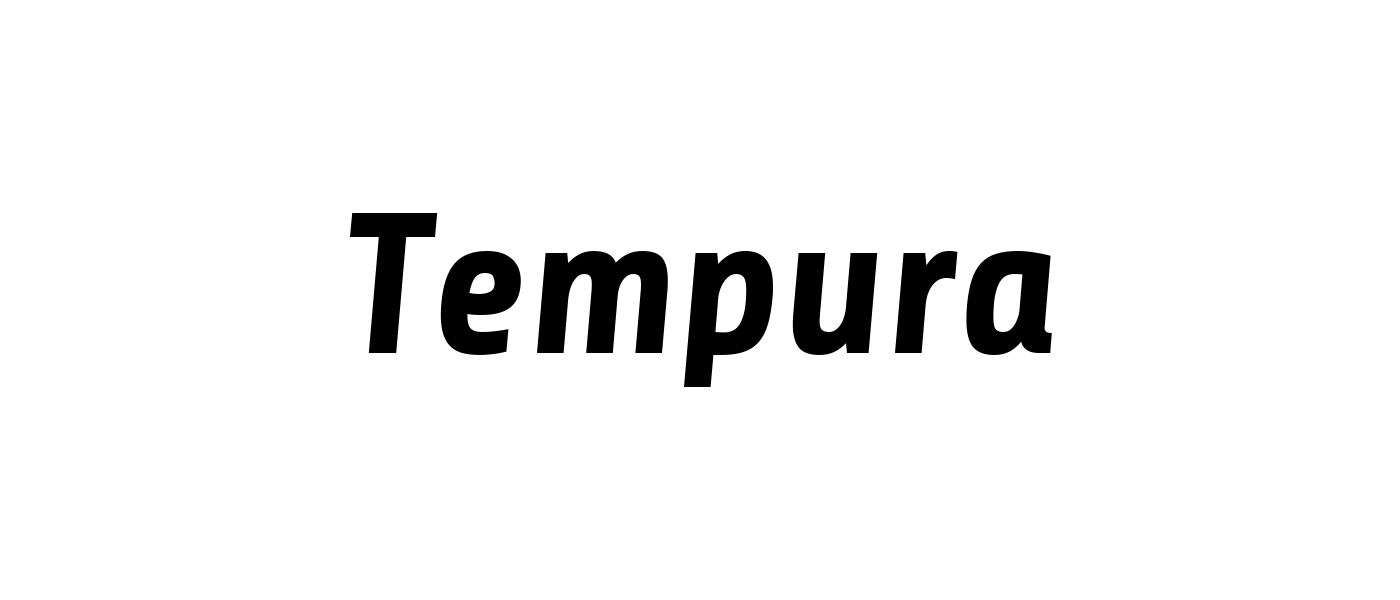

../gwfonts/NoticiaText-Italic.ttf


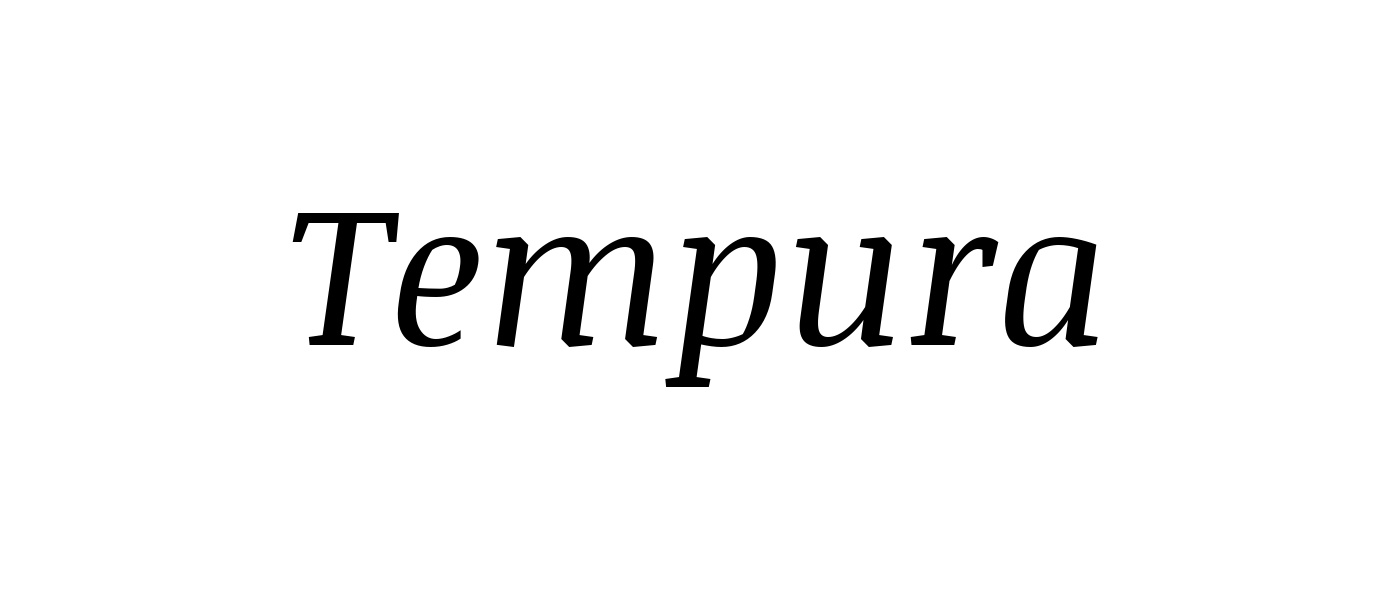

../gwfonts/NovaFlat.ttf


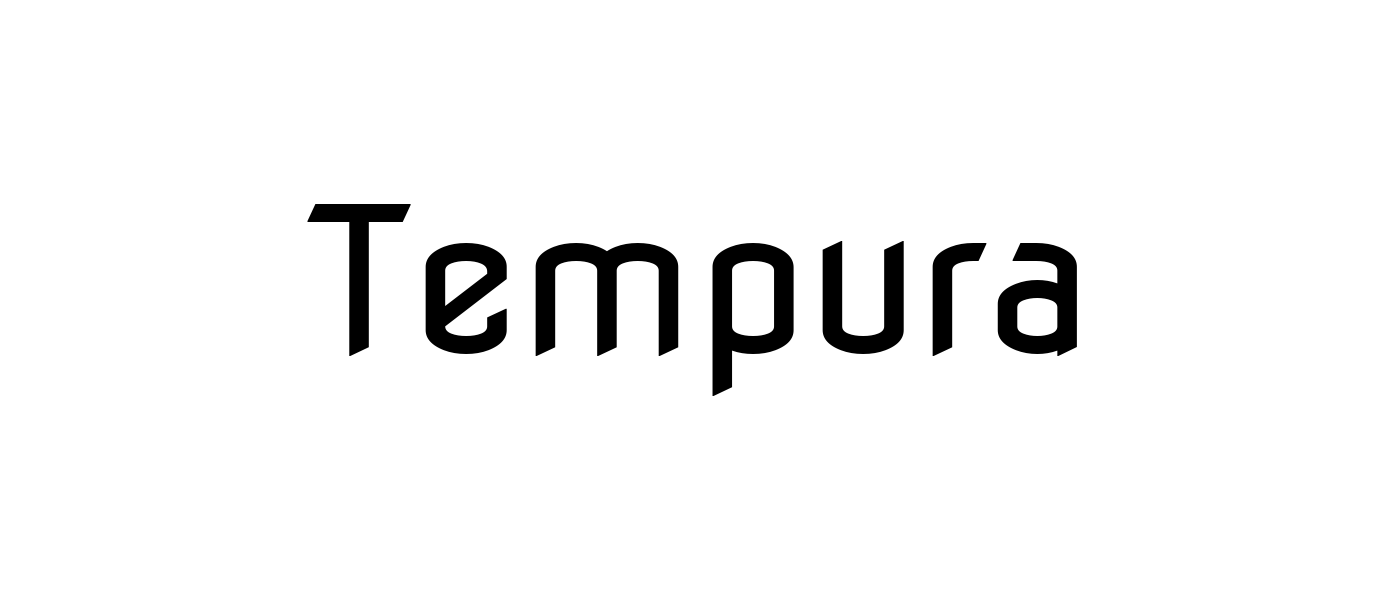

../gwfonts/Engagement-Regular.ttf


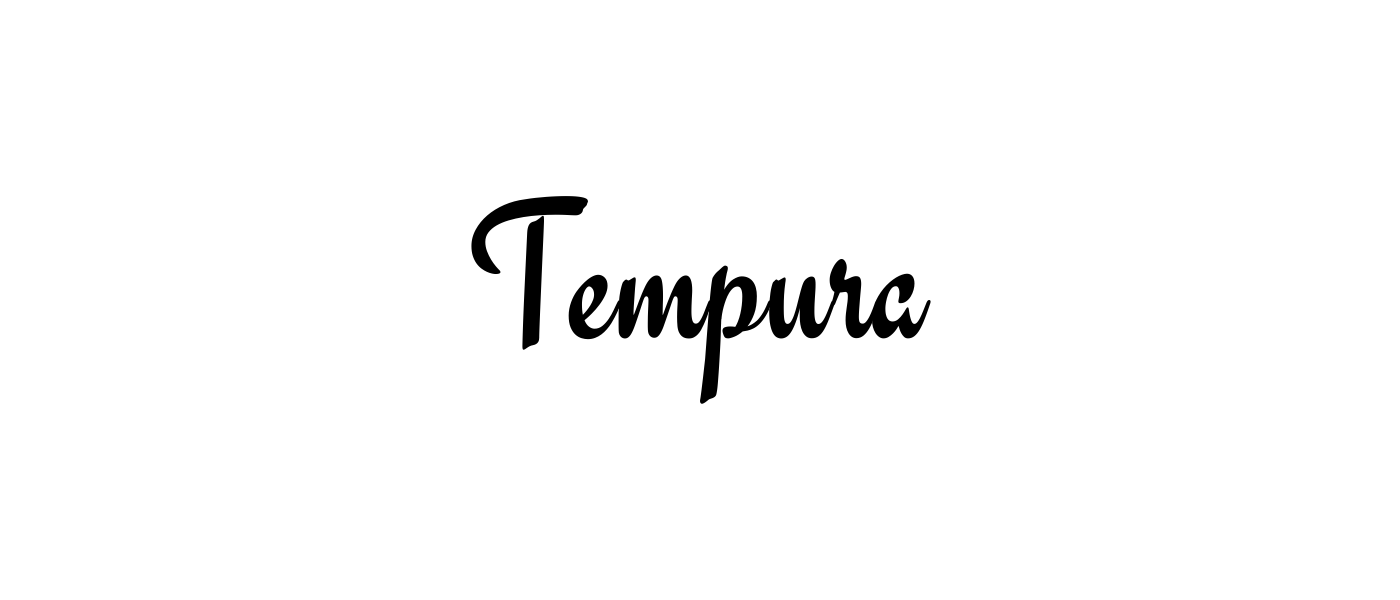

../gwfonts/QuattrocentoSans-Regular.ttf


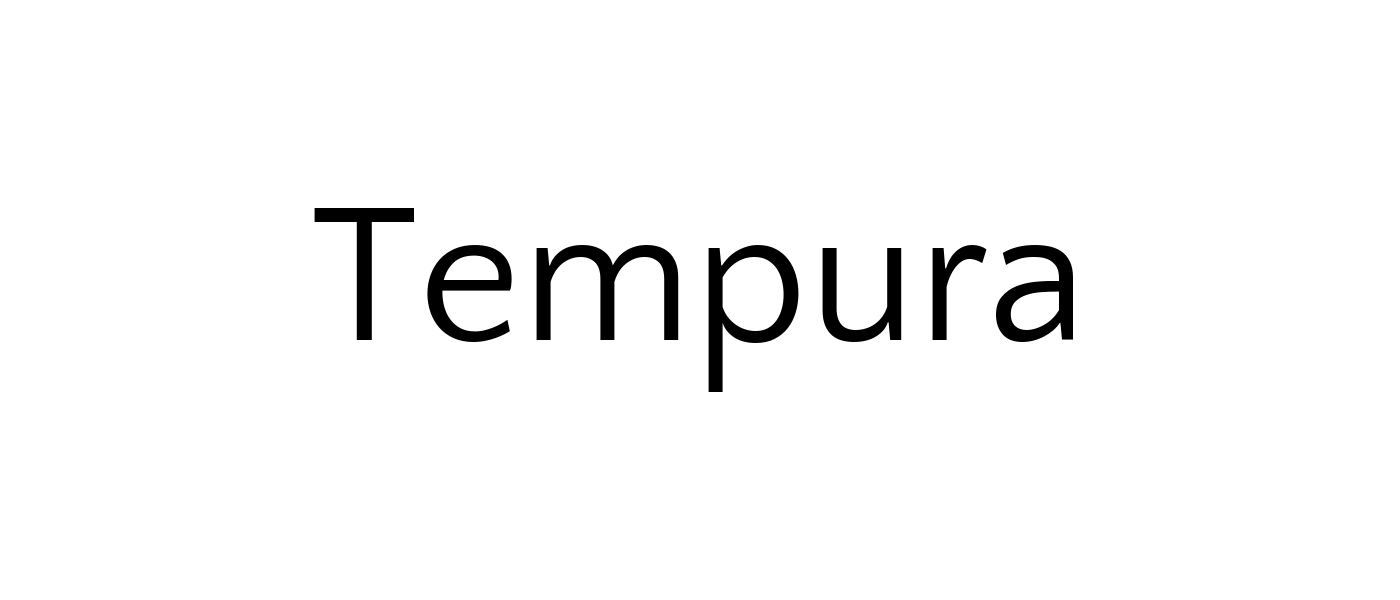

../gwfonts/Vollkorn-Italic.ttf


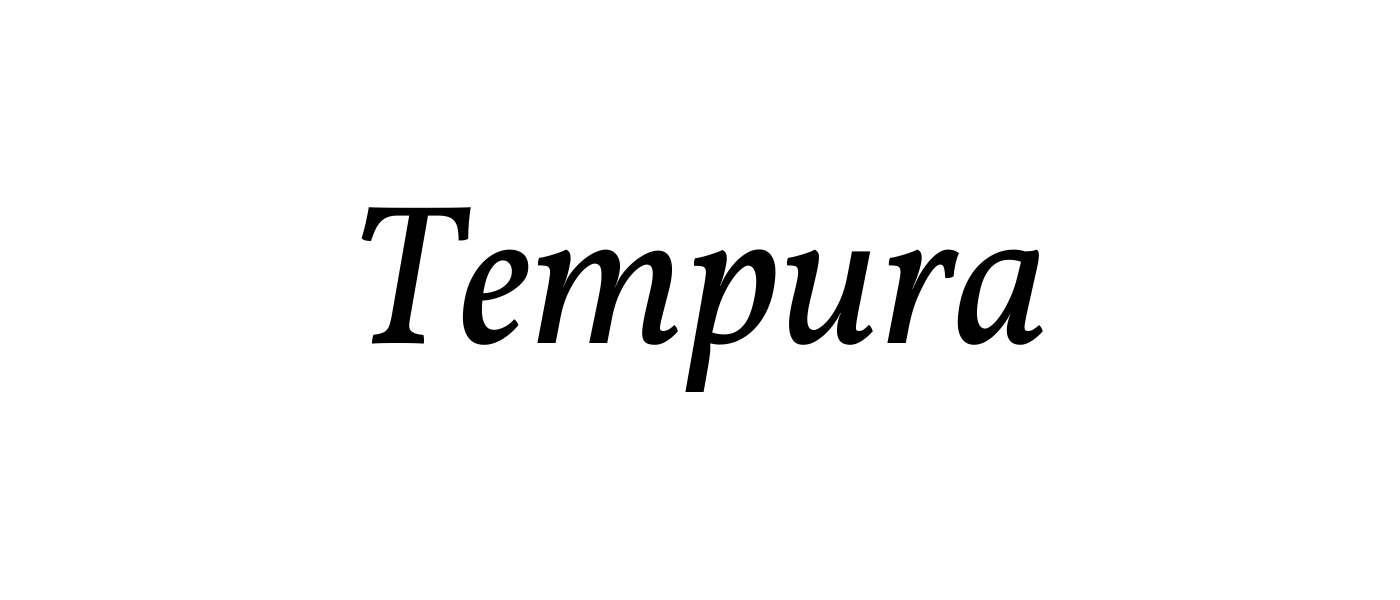

../gwfonts/CrimsonText-BoldItalic.ttf


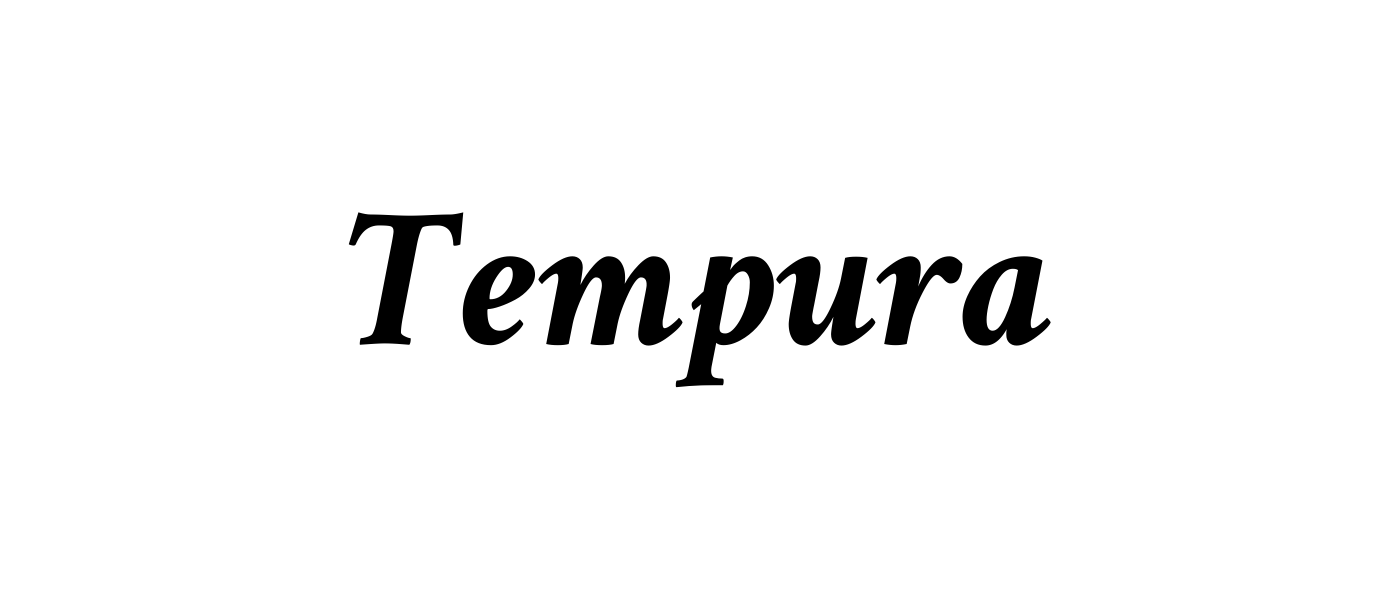

../gwfonts/ArchitectsDaughter.ttf


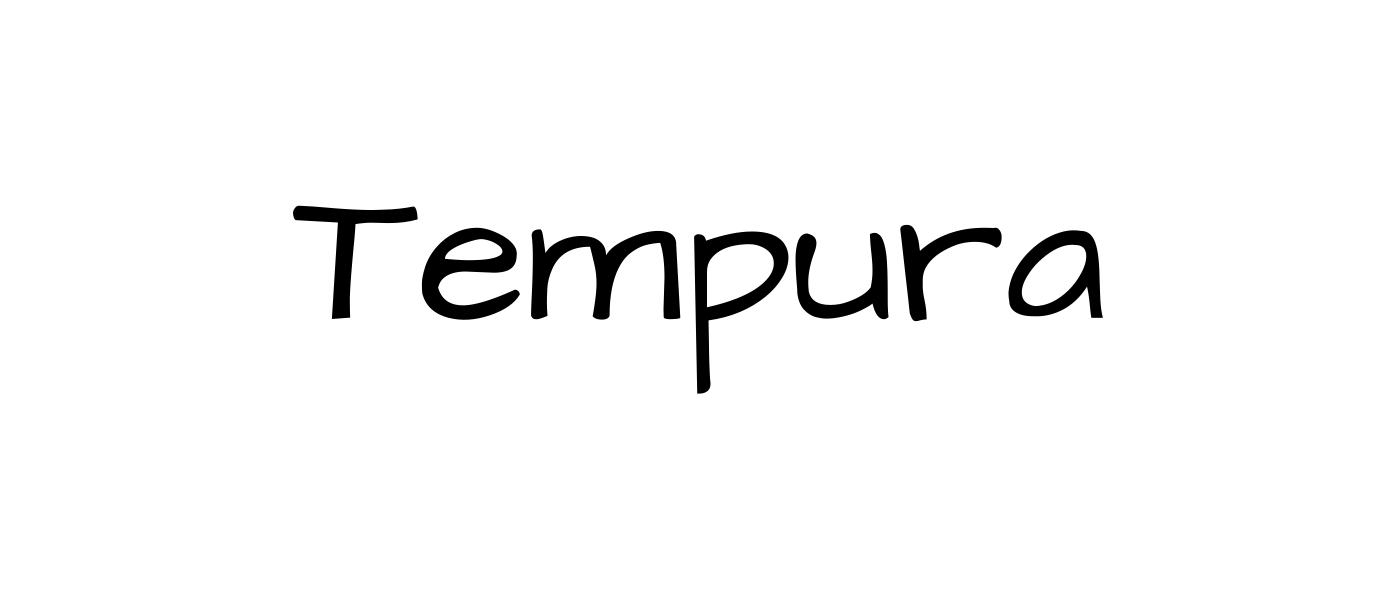

../gwfonts/Karla-Regular.ttf


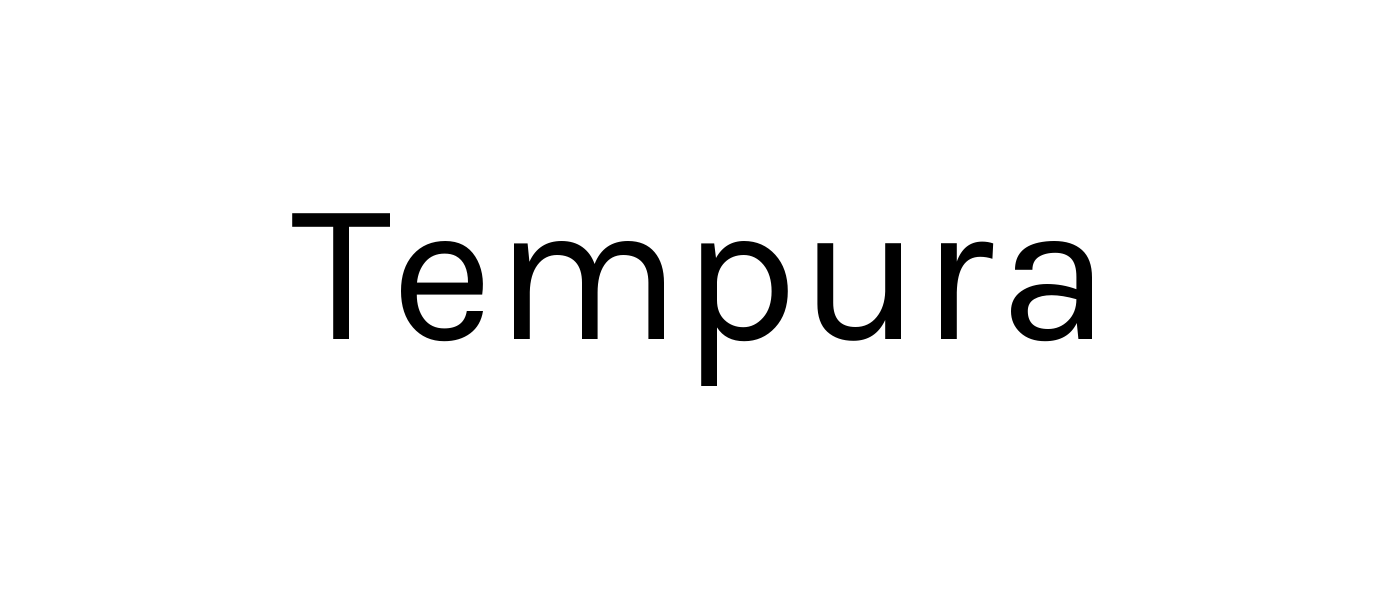

../gwfonts/Cantarell-BoldOblique.ttf


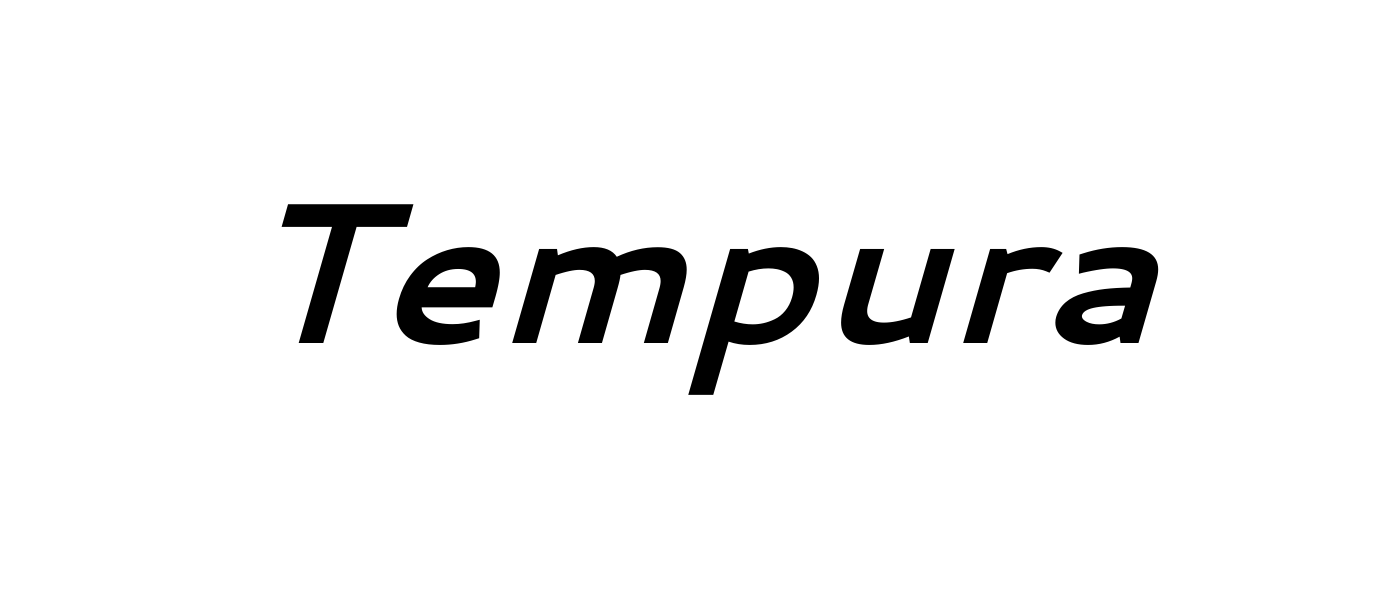

../gwfonts/VampiroOne-Regular.ttf


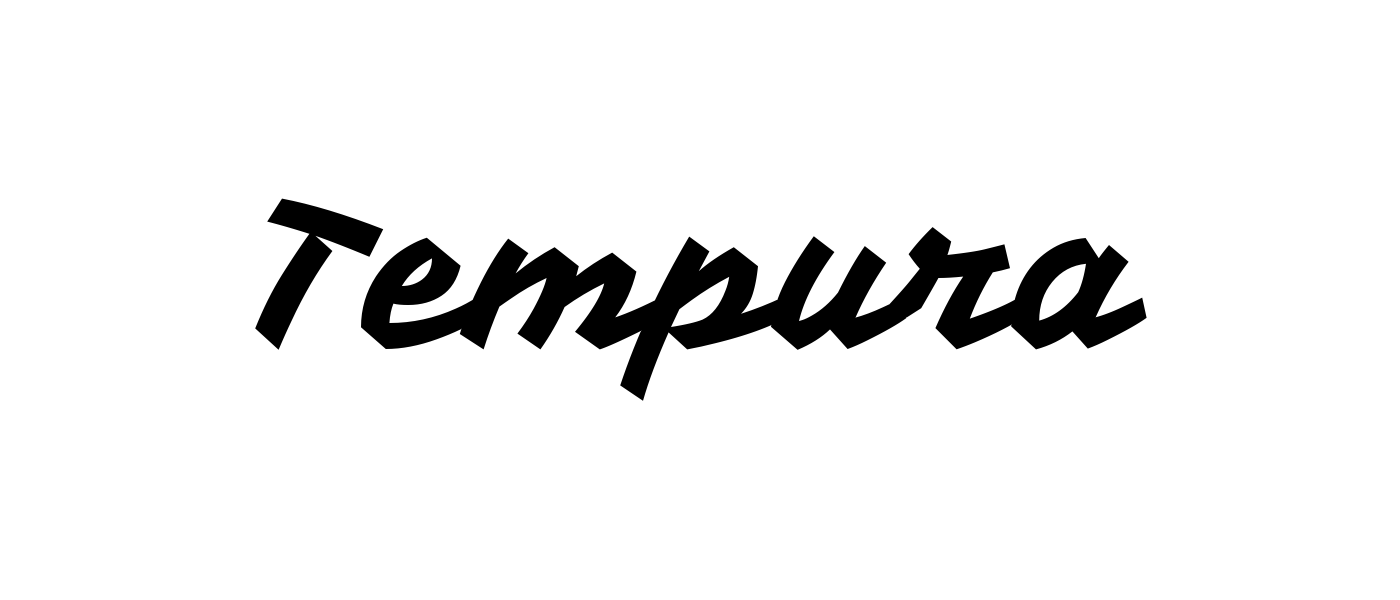

../gwfonts/GenBkBasBI.ttf


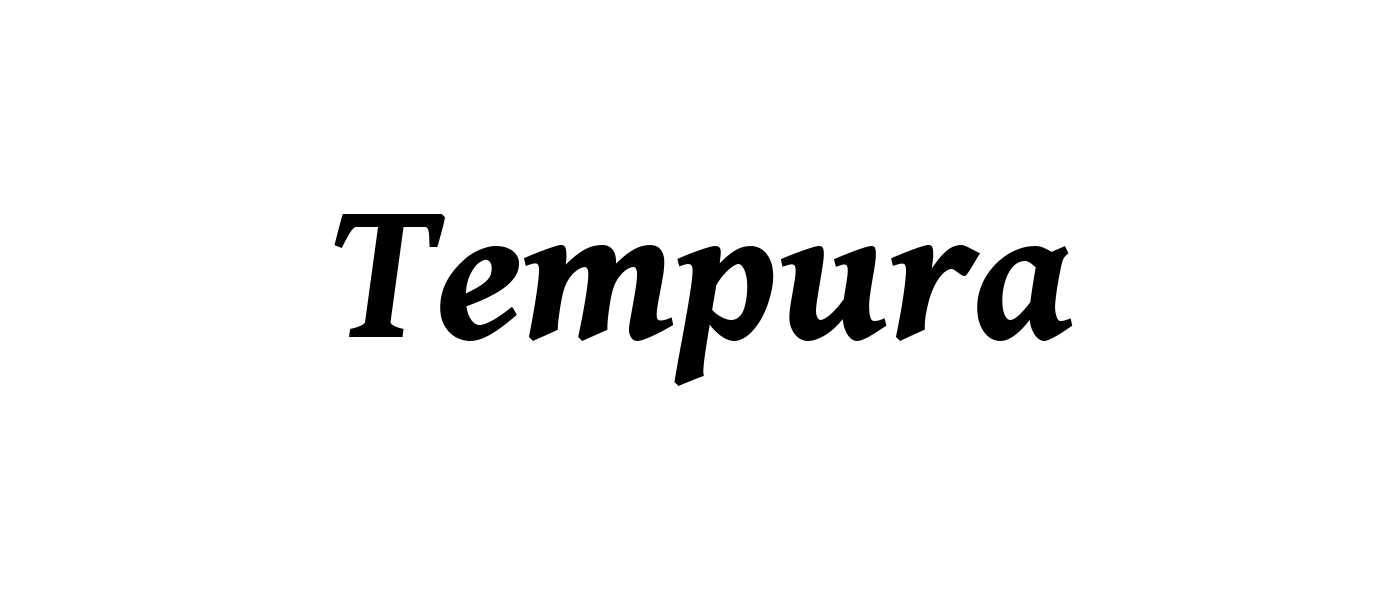

../gwfonts/ExpletusSans-MediumItalic.ttf


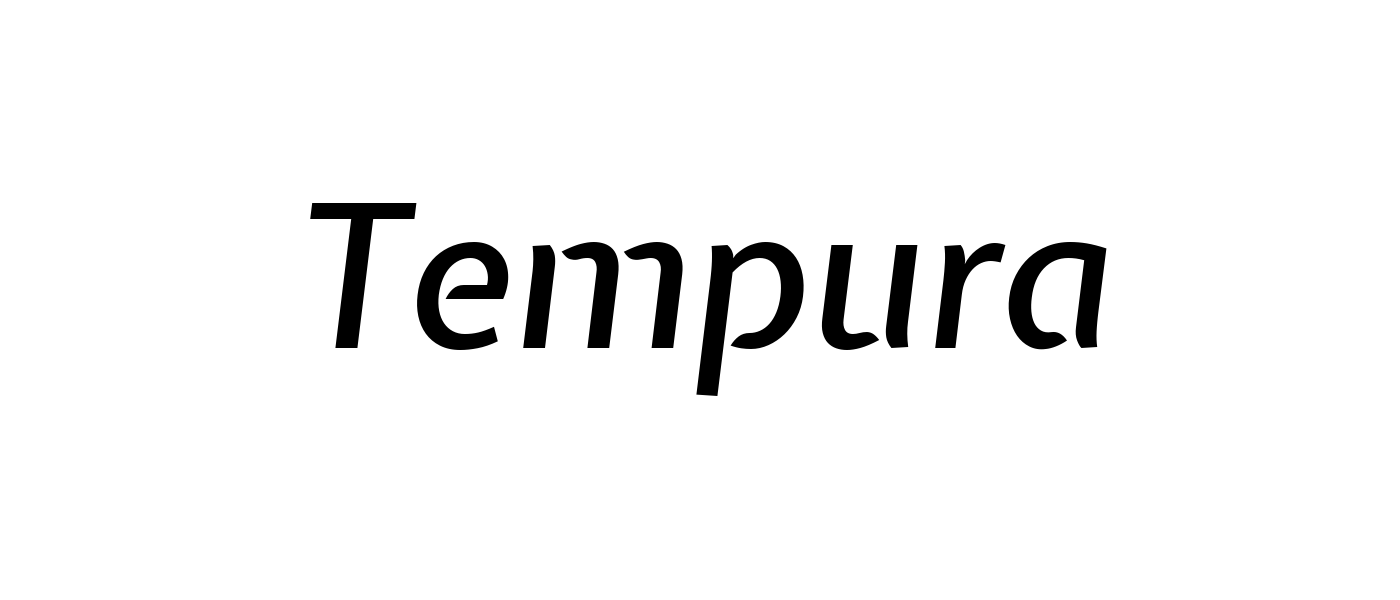

../gwfonts/Roboto-LightItalic.ttf


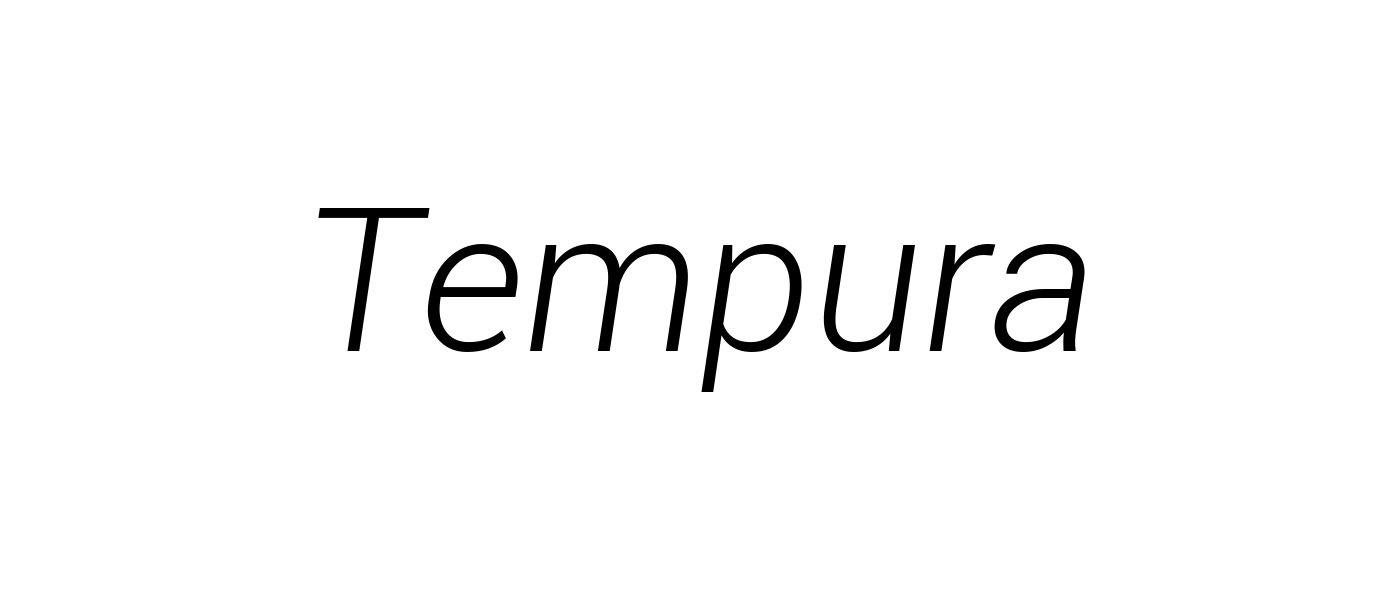

../gwfonts/Lusitana-Bold.ttf


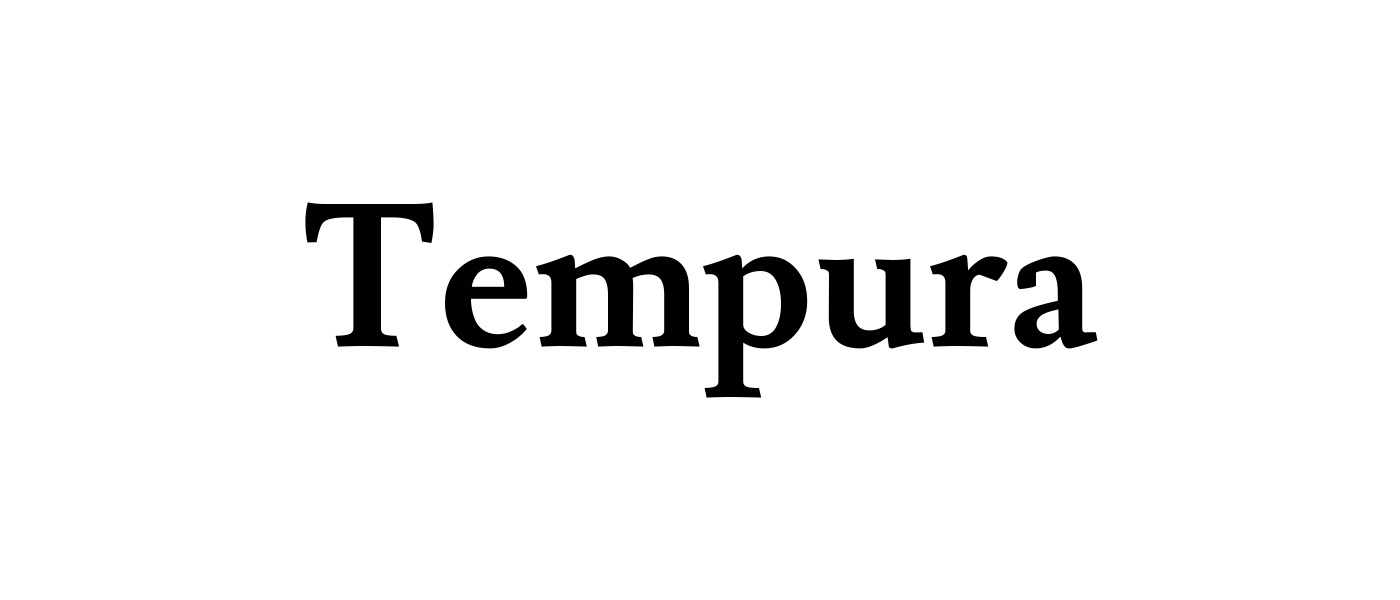

../gwfonts/Exo-Medium.ttf


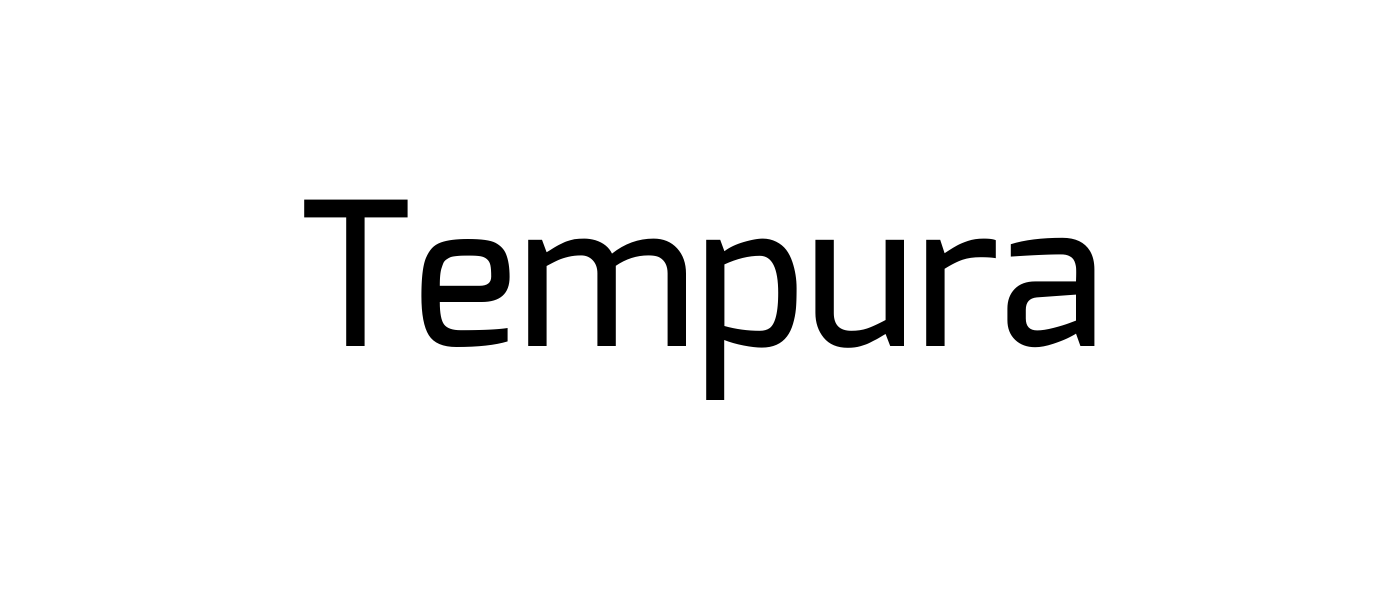

../gwfonts/Exo-Regular.ttf


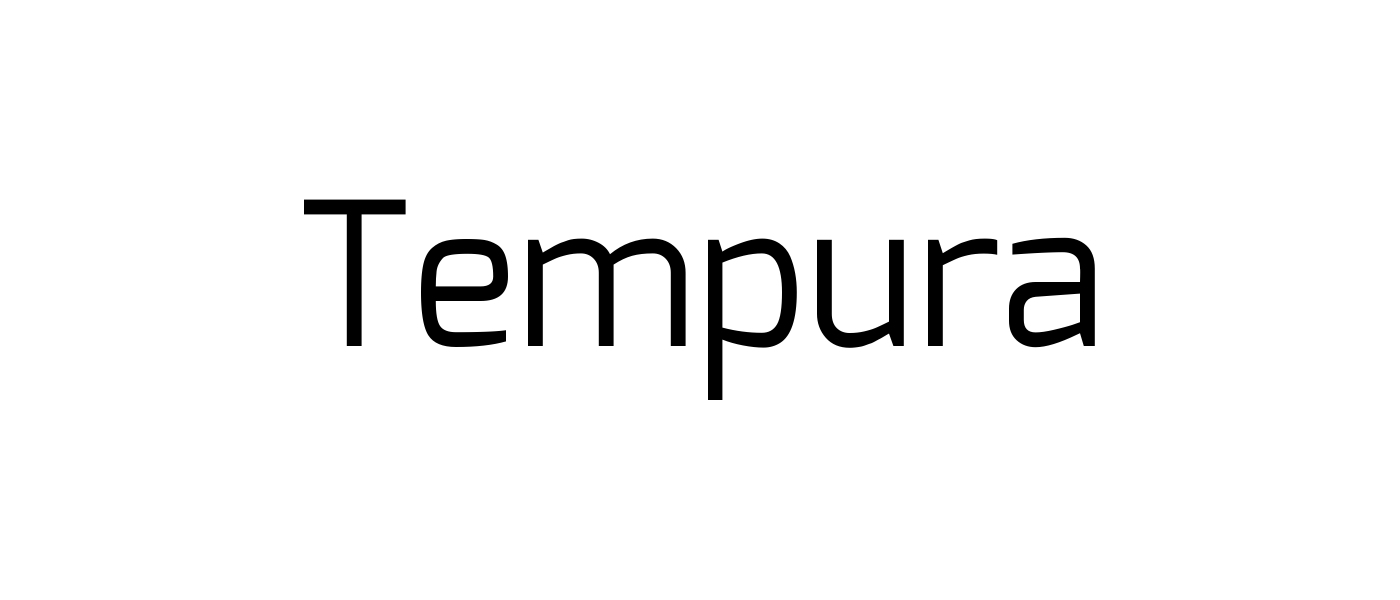

../gwfonts/IMFeENrm28P.ttf


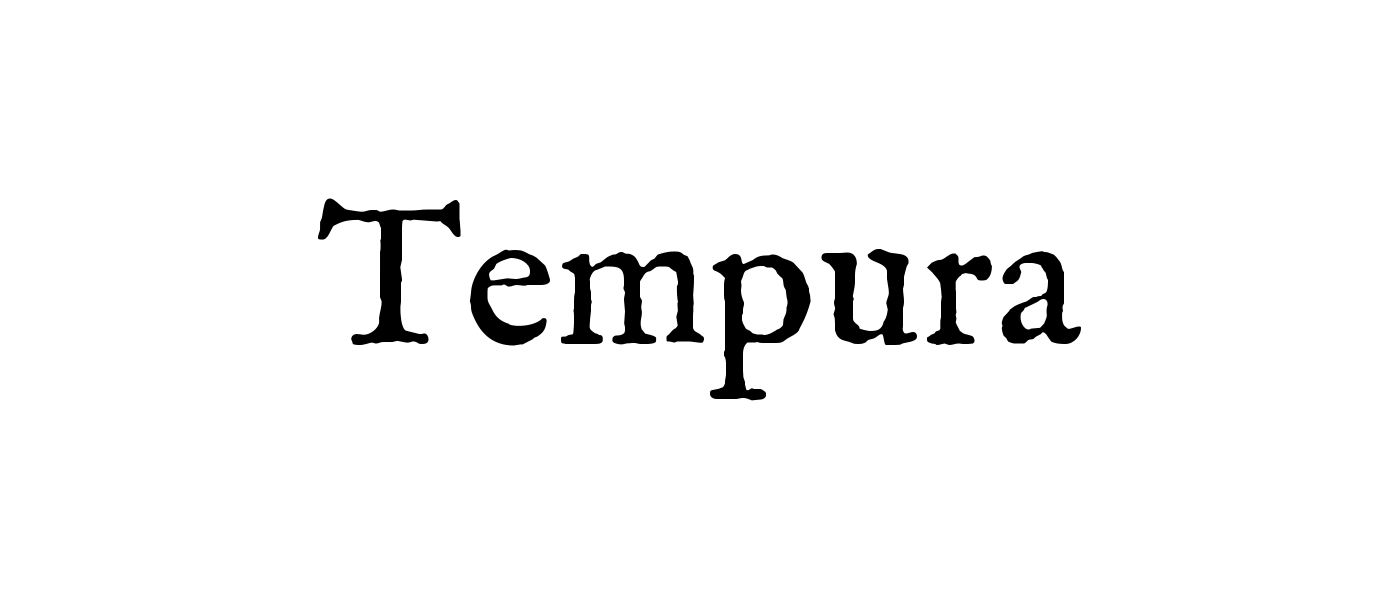

../gwfonts/MouseMemoirs-Regular.ttf


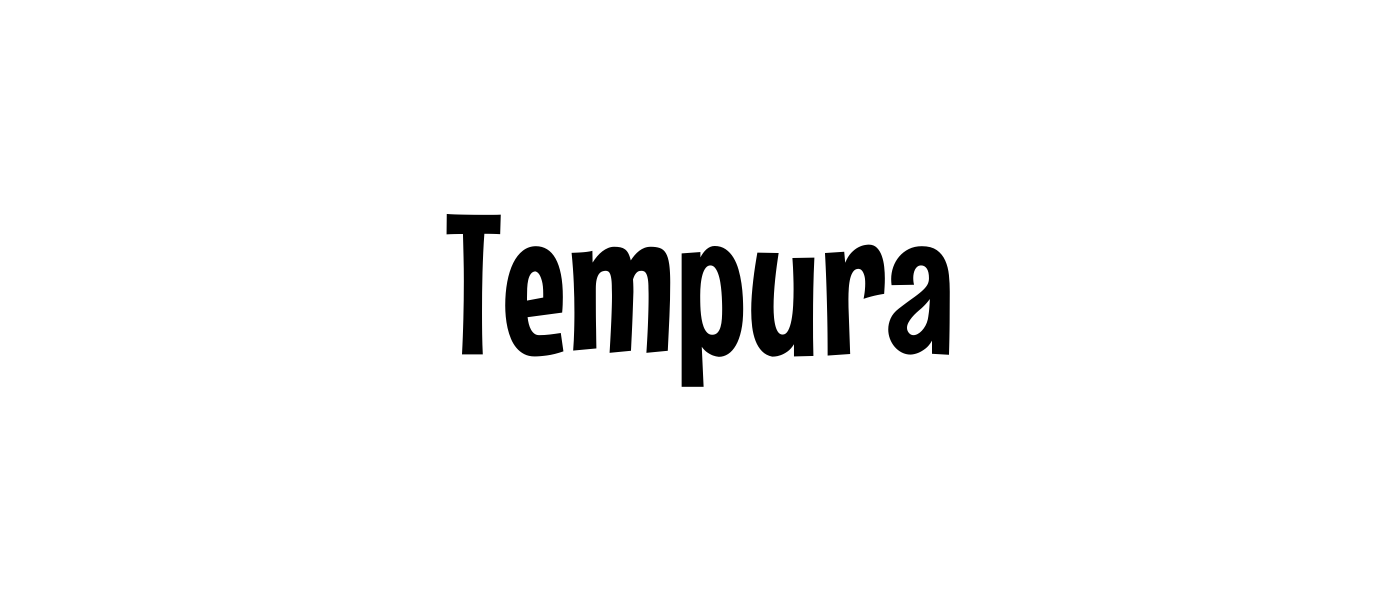

../gwfonts/Radley-Regular.ttf


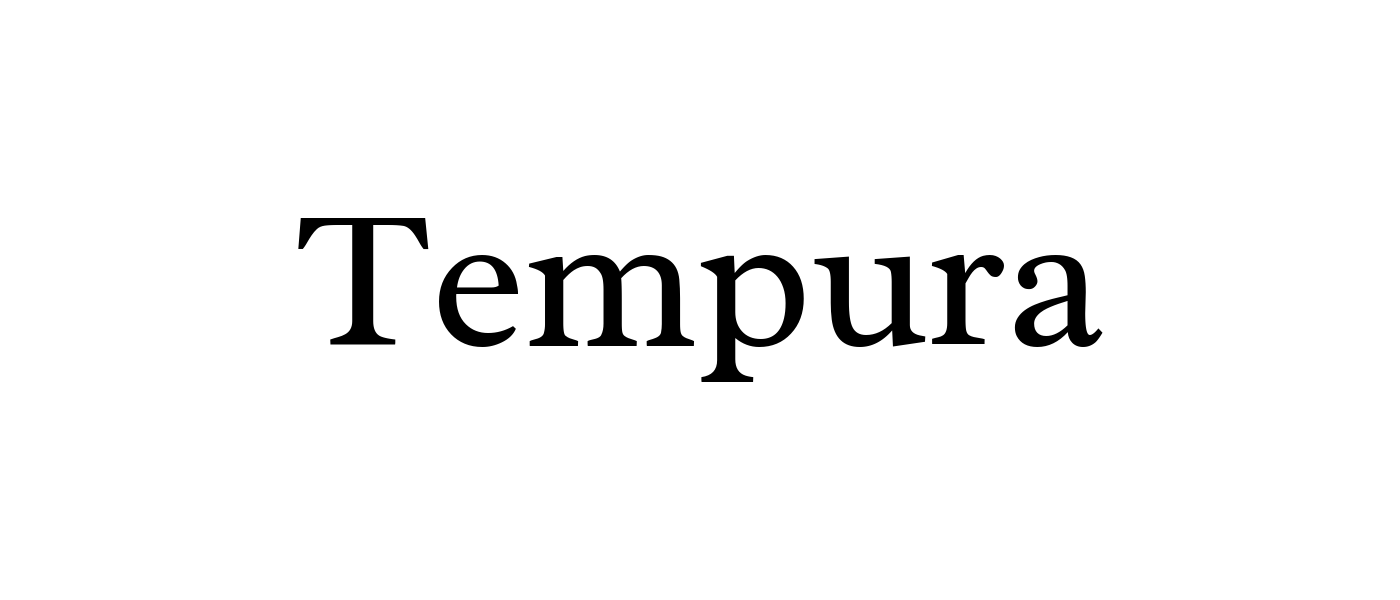

../gwfonts/Padauk-Bold.ttf


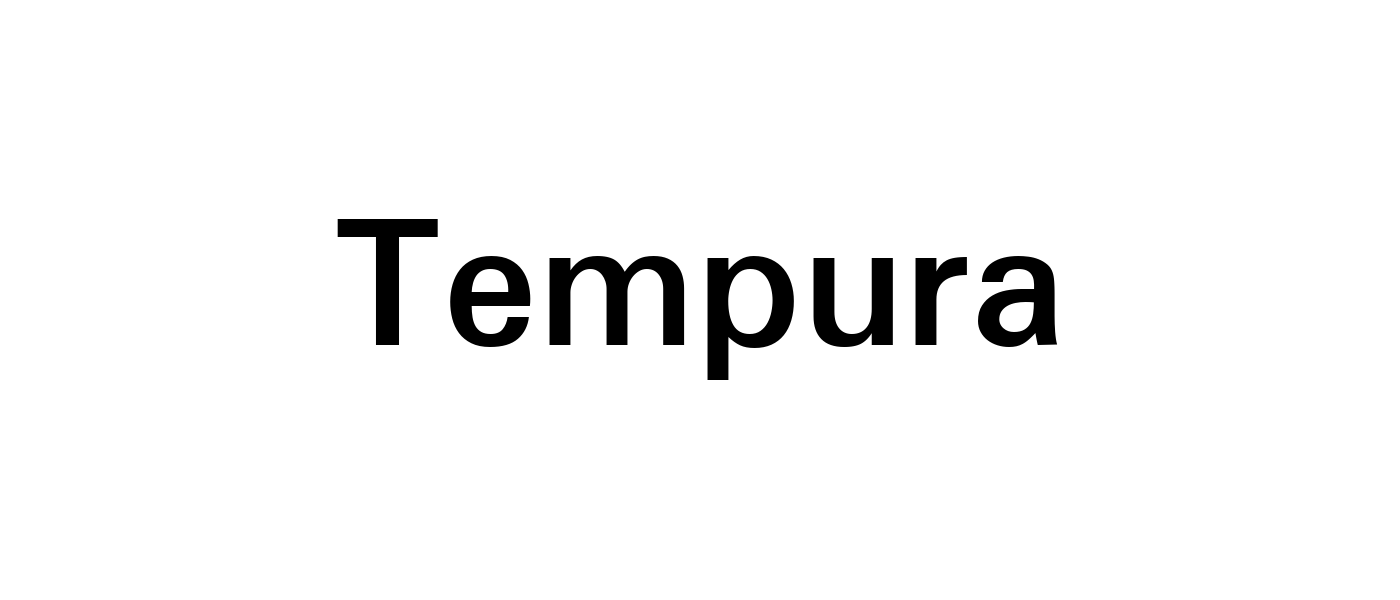

../gwfonts/Tienne-Heavy.ttf


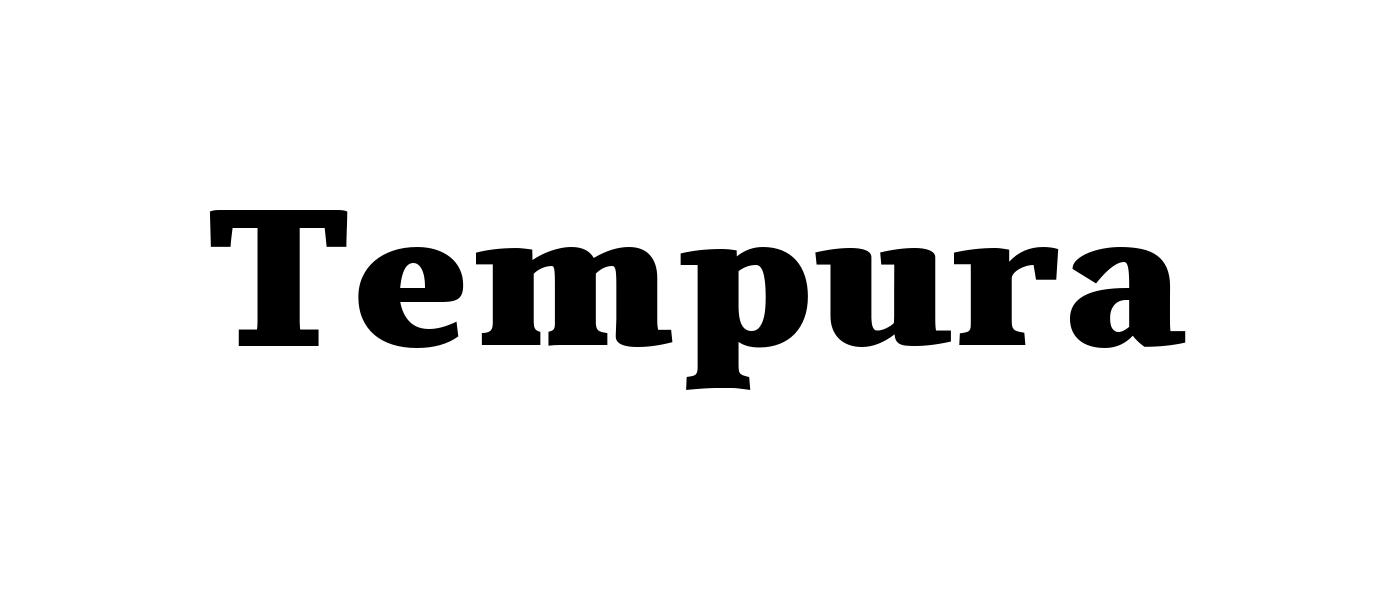

../gwfonts/Brawler-Regular.ttf


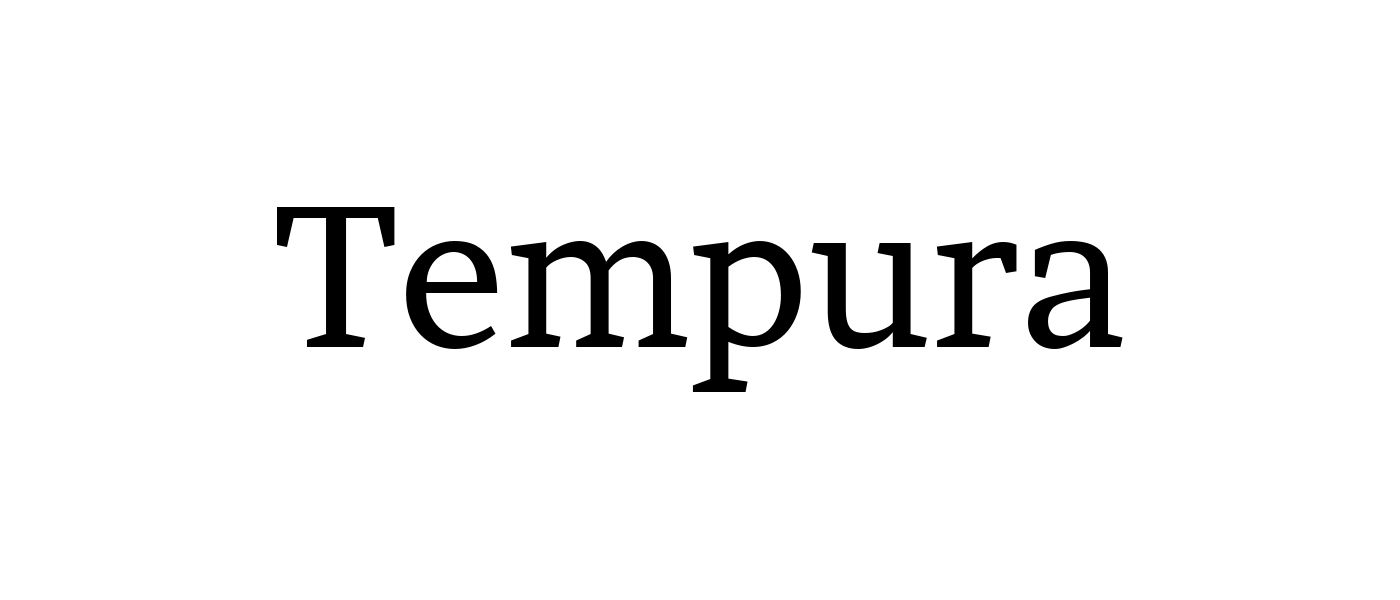

../gwfonts/Quicksand-LightItalic.ttf


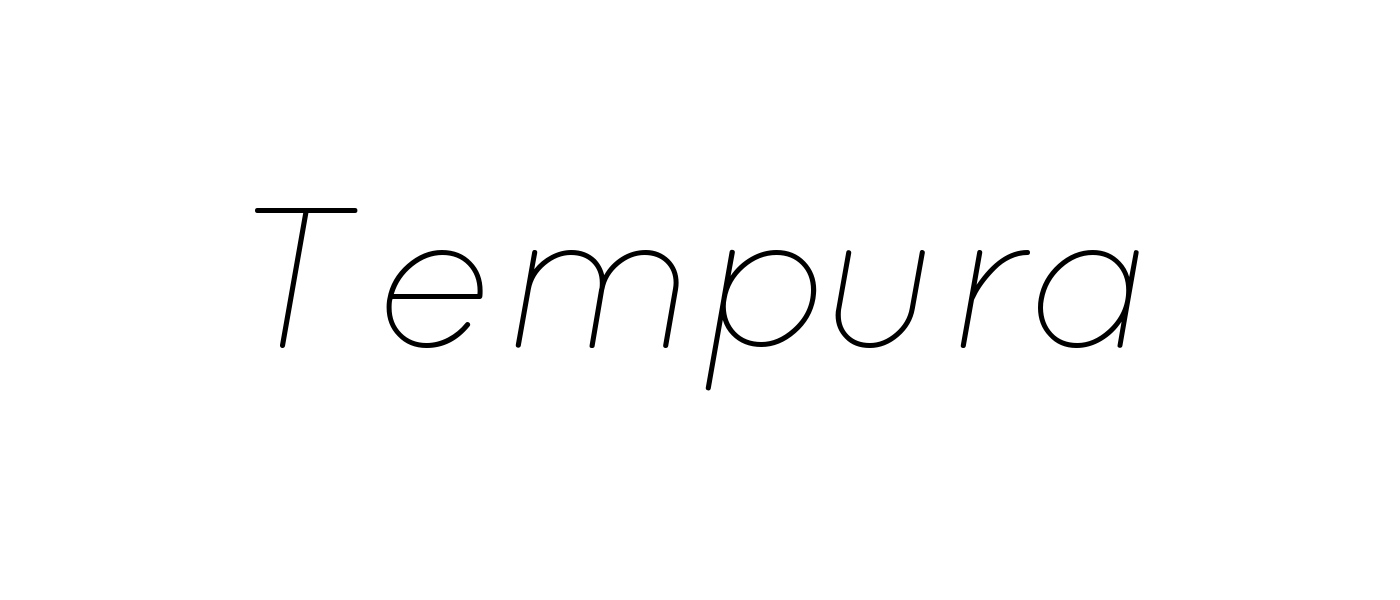

../gwfonts/Neuton-Regular.ttf


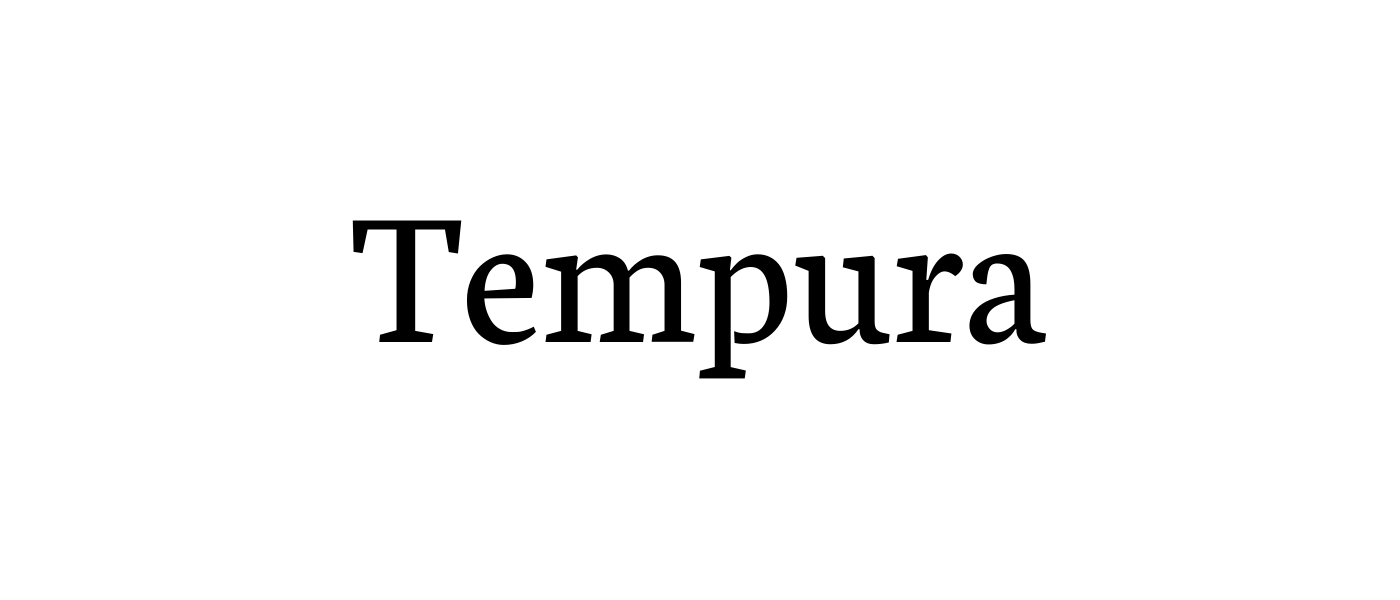

../gwfonts/Scada-Regular.ttf


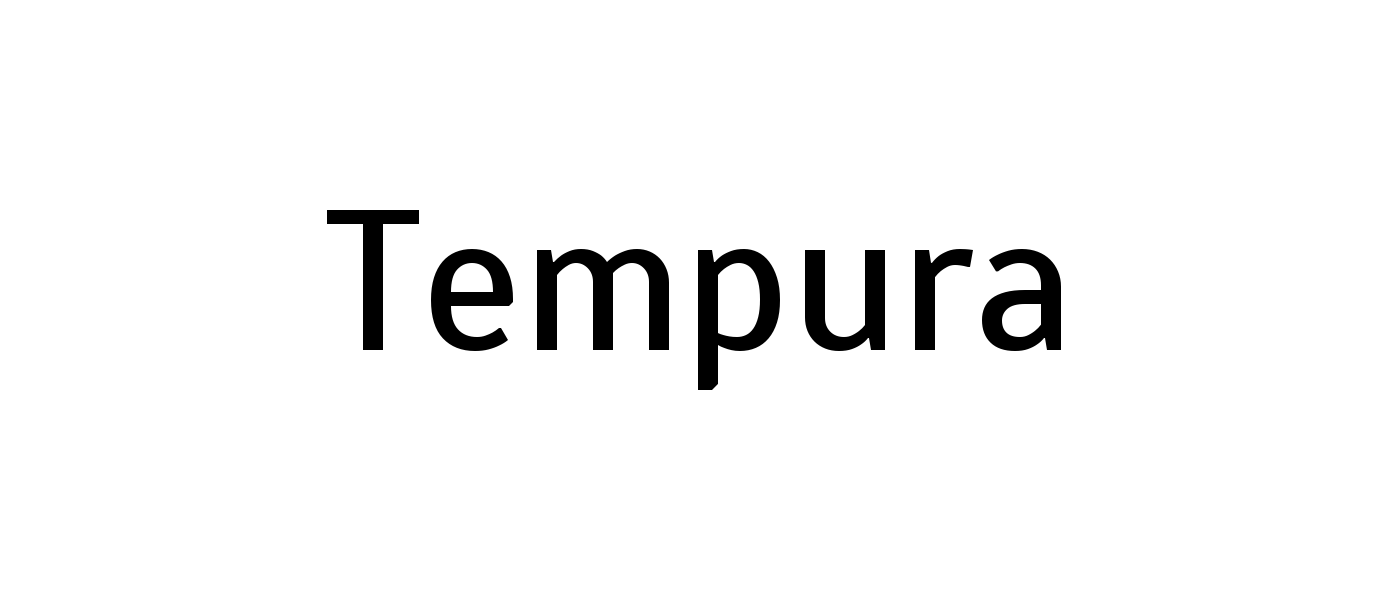

../gwfonts/SortsMillGoudy-Italic.ttf


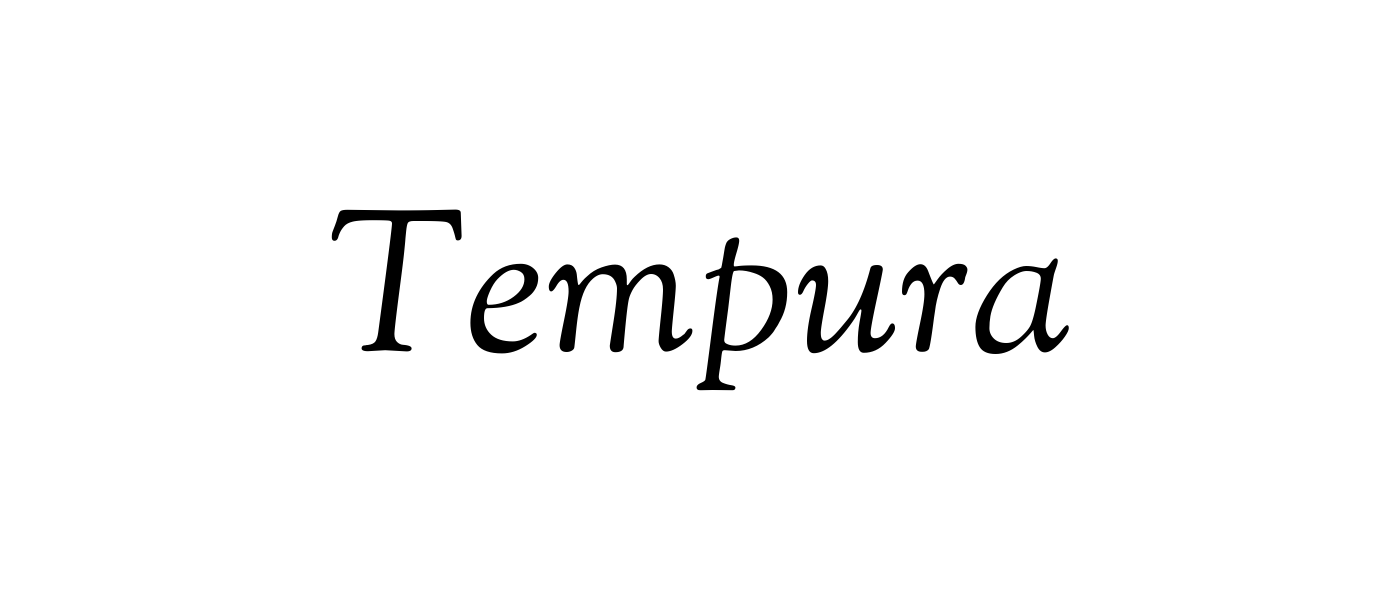

In [68]:
# for i in range(len(all_font_paths)):
# for i in range(200, len(all_font_paths)):
text = 'Tempura'
gwfont_paths = [os.path.join('../gwfonts', font_name) for font_name in os.listdir('../gwfonts')]  
for i in range(0, 200):
  # font_path = inclusive_cjk_font_paths[i]
  font_path = gwfont_paths[i]
  font_name = os.path.splitext(os.path.basename(font_path))[0]
  print(font_path)
  font = ImageFont.truetype(font_path, character_size)
  image = draw_text_with_new_lines(text, font, img_width=img_width, img_height=img_height)
  # fox_image = draw_text_with_new_lines(fox_text, font, img_width=img_width, img_height=img_height)
  image.save(f'outputs/{font_name}.png')
  # display(image)
  # display(fox_image)
  # preprocessed_image = preprocess(image)
  # display(to_pil_image(preprocessed_image))
  # break

311
13
298


In [6]:
for exclusive_cjk_font_path in exclusive_cjk_font_paths:
  if exclusive_cjk_font_path not in os.listdir(cjk_font_dir_path):
    print(exclusive_cjk_font_path)

In [7]:
tmp = []
for exclusive_cjk_font_path in exclusive_cjk_font_paths:
  if exclusive_cjk_font_path not in tmp:
    tmp.append(exclusive_cjk_font_path)
  else:
    print(exclusive_cjk_font_path)

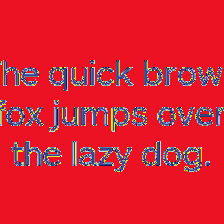

In [4]:
image_path = '../attributeData/grayscale_images/ARSMaquetteWebOne.png'
image = Image.open(image_path)
preprocessed_image = preprocess(image)
display(to_pil_image(preprocessed_image))